## Python for Finance 3 - Low Risk Investment Options

In [30]:
# Provides ways to work with large multidimensional arrays
import numpy as np 
# Allows for further data manipulation and analysis
import pandas as pd
from pandas_datareader import data as web # Reads stock data 
import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
%matplotlib inline

import datetime as dt # For defining dates
import mplfinance as mpf # Matplotlib finance

import time

# Used to get data from a directory
import os
from os import listdir
from os.path import isfile, join

#### Dates

In [31]:
# Define path to files
PATH = "../data/stock-list/"

# Start date defaults
ST_YEAR = 2017
ST_MONTH = 1
ST_DAY = 3
ST_DATE_STR = f"{ST_YEAR}-{ST_MONTH}-{ST_DAY}"
ST_DATE_DATETIME = dt.datetime(ST_YEAR, ST_MONTH, ST_DAY)

# End date defaults
EN_YEAR = 2021
EN_MONTH = 8
EN_DAY = 19
EN_DATE_STR = f"{EN_YEAR}-{EN_MONTH}-{EN_DAY}"
EN_DATE_DATETIME = dt.datetime(EN_YEAR, EN_MONTH, EN_DAY)

#### Get stock file names in a list

In [32]:
files = [x for x in listdir(PATH) if isfile(join(PATH, x))]
tickers = [os.path.splitext(x)[0] for x in files]
tickers

tickers.sort()
tickers

['A',
 'AA',
 'AAL',
 'AAME',
 'AAOI',
 'AAON',
 'AAP',
 'AAPL',
 'AAT',
 'AAWW',
 'ABBV',
 'ABC',
 'ABCB',
 'ABEO',
 'ABG',
 'ABIO',
 'ABM',
 'ABMD',
 'ABR',
 'ABT',
 'ABTX',
 'AC',
 'ACAD',
 'ACBI',
 'ACC',
 'ACCO',
 'ACER',
 'ACGL',
 'ACHC',
 'ACHV',
 'ACIW',
 'ACLS',
 'ACM',
 'ACMR',
 'ACN',
 'ACNB',
 'ACOR',
 'ACRE',
 'ACRS',
 'ACRX',
 'ACTG',
 'ACU',
 'ACY',
 'ADBE',
 'ADC',
 'ADES',
 'ADI',
 'ADM',
 'ADMA',
 'ADMP',
 'ADNT',
 'ADP',
 'ADS',
 'ADSK',
 'ADTN',
 'ADUS',
 'ADVM',
 'ADXS',
 'AE',
 'AEE',
 'AEHR',
 'AEIS',
 'AEL',
 'AEMD',
 'AEO',
 'AEP',
 'AERI',
 'AES',
 'AEY',
 'AFG',
 'AFI',
 'AFL',
 'AGCO',
 'AGE',
 'AGEN',
 'AGFS',
 'AGIO',
 'AGLE',
 'AGM',
 'AGNC',
 'AGO',
 'AGR',
 'AGRX',
 'AGS',
 'AGTC',
 'AGX',
 'AGYS',
 'AHH',
 'AHT',
 'AIG',
 'AIMC',
 'AIN',
 'AINC',
 'AIR',
 'AIRG',
 'AIRI',
 'AIRT',
 'AIT',
 'AIV',
 'AIZ',
 'AJG',
 'AJRD',
 'AJX',
 'AKAM',
 'AKBA',
 'AKR',
 'AKTS',
 'AL',
 'ALB',
 'ALBO',
 'ALCO',
 'ALDX',
 'ALE',
 'ALEC',
 'ALEX',
 'ALG',
 'ALGN',
 'ALG

#### Function that returns a dataframe from a CSV

In [33]:
# Reads a dataframe from the CSV file, changes index to date and returns it
def get_df_from_csv(ticker):
    # Try to get the file and if it doesn't exist issue a warning
    try:
        df = pd.read_csv(PATH + ticker + '.csv')
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        return df

#### Function that saves dataframe to CSV

In [34]:
def save_dataframe_to_csv(df, ticker):
    df.to_csv(PATH + ticker + '.csv')

#### Return 1st valid date in dataframe

In [35]:
# Receives a start and end date and returns the 1st date in that range
def get_valid_dates(df, sdate, edate):
    
    try:
        mask = (df['Date'] > sdate) & (df['Date'] <= edate) 
        sm_df = df.loc[mask]
        sm_df = sm_df.set_index(['Date'])
    
        # Get smallest date that matches
        sm_date = sm_df.index.min()
        last_date = sm_df.index.max()
    
        # Add leading zeros to date
        # Split string on - and if a number is less than 2 add a zero in front
        date_leading = '-'.join(('0' if len(x)<2 else '')+x for x in sm_date.split('-'))
        date_ending = '-'.join(('0' if len(x)<2 else '')+x for x in last_date.split('-'))
        print(date_leading, " ", date_ending)
    except Exception:
        print("Date Corrupted")
    else:
        return date_leading, date_ending

#### Returns ROI over time

In [36]:
# Get ROI between 2 dates
def roi_between_dates(df, sdate, edate):
    
    try:
        # Gets the Adj Close price for 1st & last date 
        start_val = df.loc[sdate,'Adj Close'] 
        end_val = df.loc[edate,'Adj Close']
        roi = ((end_val - start_val) / start_val)
    except Exception:
        print("Data Corrupted")
    else:
        return roi

#### Get mean between dates

In [37]:
def get_mean_between_dates(df, sdate, edate):
    mask = (df['Date'] > sdate) & (df['Date'] <= edate)
    return df.loc[mask]["Adj Close"].mean()

#### Get standard deviation between dates

In [38]:
def get_sd_between_dates(df, sdate, edate):
    mask = (df['Date'] > sdate) & (df['Date'] <= edate)
    return df.loc[mask]["Adj Close"].std()

#### Get coefficient of variation between dates

In [39]:
def get_cov_between_dates(df, sdate, edate):
    mean = get_mean_between_dates(df, sdate, edate)
    sd = get_sd_between_dates(df, sdate, edate)
    return sd / mean

#### Test function

In [40]:
# Get our 1st ticker
tickers[0]
print("Dataframe for Ticker", tickers[0])

# Get a dataframe for that ticker
stock_a = get_df_from_csv(tickers[0])
stock_a

# Get the first and last valid date in the date range
print(get_valid_dates(stock_a, '2020-01-01', '2020-12-31'))
sdate, edate = get_valid_dates(stock_a, '2020-01-01', '2020-12-31')
sdate
edate

print("Adj Close Mean :", get_mean_between_dates(stock_a, sdate, edate))
print("Adj Close Standard Deviation :", get_sd_between_dates(stock_a, sdate, edate))
print("Adj Close Coefficient of Variation :", get_cov_between_dates(stock_a, sdate, edate))

stock_a = stock_a.set_index(['Date'])
stock_a

print("Return on Investment since 2020:", roi_between_dates(stock_a, sdate, edate))

Dataframe for Ticker A
2020-01-02   2020-12-31
('2020-01-02', '2020-12-31')
2020-01-02   2020-12-31
Adj Close Mean : 91.50280113825723
Adj Close Standard Deviation : 13.75351478464988
Adj Close Coefficient of Variation : 0.15030703556133596
Return on Investment since 2020: 0.38750012502884673


#### COV & ROI for all stocks over defined period

In [41]:
def get_cov_ror(tickers, sdate, edate):
    # Define column names for dataframe
    col_names = ["Ticker", "COV", "ROI"]
    
    # Create dataframe with column names
    df = pd.DataFrame(columns = col_names)
    
    for ticker in tickers:
        print("Working on :", ticker)
        s_df = get_df_from_csv(ticker)
    
        sdate2, edate2 = get_valid_dates(s_df, sdate, edate)
    
        cov = get_cov_between_dates(s_df, sdate2, edate2)
    
        # Set date as index
        s_df = s_df.set_index(['Date'])
        roi = roi_between_dates(s_df, sdate2, edate2)

        # Add stock data to new dataframe row
        # len provides the length of the dataframe which is the next open index
        df.loc[len(df.index)] = [ticker, cov, roi]
    
    return df

In [ ]:
# Remove CRC GRUB AAN ARNC
market_df = get_cov_ror(tickers, '2017-01-03', '2017-12-31')

In [ ]:
# Get top 20 stocks ROI
market_df.sort_values(by=['ROI'], ascending=False).head(20)

#### Merge multiple stocks in one dataframe by column name

In [44]:
def merge_df_by_column_name(col_name, sdate, edate, *tickers):
    # Will hold data for all dataframes with the same column name
    mult_df = pd.DataFrame()
    
    for x in tickers:
        df = get_df_from_csv(x)
        df['Date'] = pd.to_datetime(df['Date'])
        # Use a mask to grab data between defined dates
        mask = (df['Date'] >= sdate) & (df['Date'] <= edate)
        mult_df[x] = df.loc[mask][col_name]
        
    return mult_df

#### Create a correlation matrix using FAANGS

<AxesSubplot:>

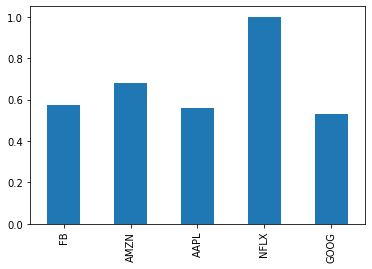

In [45]:
# Correlation tells us how closely 2 stocks returns move together
# Correlation is a standardized value lying between -1 and 1
# When this value is greater that .5 we say that these stocks are strongly correlated
# Of course each stocks price is perfectly correlated with itself

# We focus on the correlation of returns because investors care about returns 

# Merge all stock price data into 1 dataframe
faang_list = ["FB", "AMZN", "AAPL", "NFLX", "GOOG"]
mult_df = merge_df_by_column_name('daily_return',  '2020-1-1', '2020-12-31', *faang_list)
mult_df

# Generate a Correlation Matrix
mult_df.corr()

# We can look at the correlation between Netflix and the others
mult_df.corr()['NFLX']

# We can plot this in a bar chart
mult_df.corr()['NFLX'].plot(kind='bar')

#### Get the variance of a stock

In [46]:
# Remember variance is a measure of how spread out a data set is
# Get Netflix variance
mult_df['NFLX'].var()

# Annualize by getting the number of samples and multiply
days = len(mult_df.index) # 253

nflx_a_var = mult_df['NFLX'].var() * 253
nflx_a_var

0.21435236996843451

#### Get covariance of stocks

In [47]:
mult_df.cov() * 253

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.211498,0.121090,0.165004,0.122340,0.141870
AMZN,0.121090,0.148918,0.125888,0.121261,0.100904
AAPL,0.165004,0.125888,0.218483,0.120969,0.135044
NFLX,0.122340,0.121261,0.120969,0.214352,0.094118
GOOG,0.141870,0.100904,0.135044,0.094118,0.147431


#### Why do we care about risk

Most investors don't handle massive flucuations in stock prices well. What we want to do at the very least is to make them aware of how dramatically their portfolios returns may be. We can then do our best to minimize risk by adding other stocks that have returns that aren't as closely correlated.

#### Calculating a portfolios variance

When calculating the variance of a portfolio we must define its weight, or how much of the portfolio it makes up. If you add up the weight of all stocks you get a value of 1.

$ w_1, w_2 $ = Stock Weights

$ \sigma_1, \sigma_2 $ = Stock Standard Deviations

Portfolio Variance = $ (w_1 \sigma_1 + w_2 \sigma_2)^2 $

Since $ (a+b)^2 = a^2 + 2ab + b^2 $

Then the Portfolio Variance = $ w_1^2 \sigma_1^2 + w_1 \sigma_1 w_2 \sigma_2 \rho_12 + w_2^2 \sigma_2^2 $

In [48]:
# Let's create a portfolio made up of Facebook & Newmont Corporation
port_list = ["FB", "NEM"]
port_df = merge_df_by_column_name('daily_return',  '2020-1-1', '2020-12-31', *port_list)
port_df

# Generate a Correlation Matrix to see that they are not correlated
port_df.corr()

# Get prices at the beginning of Jan 2020 to calculate weight of both stocks
price_df = merge_df_by_column_name('Adj Close',  '2020-1-1', '2020-12-31', *["FB","NEM"])
price_df.head()

# I'll buy 1 share of FB at 209.78 & 5 of NEM for 41.74 for a total of 208.70
# Total Value = $418.48
fb_wt = 209.78 / 418.48
nem_wt = 208.70 / 418.48
fb_wt = .5012 # .5012
nem_wt = .4988 # .4987 and we'll change it to .4988 so they equal 1
wts = np.array([fb_wt, nem_wt])

# The portfolio variance is found from matrix multiplication
# We transpose the weights, multiply by the covarience and then the weight to get 
# the covariance of the portfolio
wts.T
port_var = np.dot(wts.T, np.dot(port_df.cov() * 253, wts))
print("Portfolio Var :", port_var)
print("FB Var :", port_df["FB"].var() * 253)
print("NEM Var :", port_df["NEM"].var() * 253)

Portfolio Var : 0.12743409745870765
FB Var : 0.21149771065707504
NEM Var : 0.21334755276500386
